# Quel constructeur finit le plus souvent dernier des courses ?

## Code

* Traitement par python
* Transformation du dataframe en liste de listes pour traiter la question en python

In [17]:
import pandas as pd

constructor_standings = pd.read_csv(
                'C:/DEVOIRS/ENSAI1A/projet-info/data/constructor_standings.csv'
                )
constructors = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/constructors.csv')
races = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/races.csv')

jointure = pd.merge(constructor_standings, constructors, on='constructorId', how='left')
jointure = pd.merge(jointure, races, on='raceId', how='left')
jointure = jointure[['year', 'wins', 'name_x']]
jointure_liste = jointure.values.tolist()
jointure

,year,wins,name_x
0,2008,1,McLaren
1,2008,0,BMW Sauber
2,2008,0,Williams
3,2008,0,Renault
4,2008,0,Toro Rosso
...,...,...,...
13266,2024,0,Sauber
13267,2024,0,Haas F1 Team
13268,2024,0,RB F1 Team
13269,2024,0,Williams


In [21]:
jointure_liste

[[2008, 1, 'McLaren'],
 [2008, 0, 'BMW Sauber'],
 [2008, 0, 'Williams'],
 [2008, 0, 'Renault'],
 [2008, 0, 'Toro Rosso'],
 [2008, 0, 'Ferrari'],
 [2008, 1, 'McLaren'],
 [2008, 0, 'BMW Sauber'],
 [2008, 0, 'Williams'],
 [2008, 0, 'Renault'],
 [2008, 0, 'Toro Rosso'],
 [2008, 1, 'Ferrari'],
 [2008, 0, 'Toyota'],
 [2008, 0, 'Red Bull'],
 [2008, 0, 'Honda'],
 [2008, 0, 'Force India'],
 [2008, 0, 'Super Aguri'],
 [2008, 1, 'McLaren'],
 [2008, 0, 'BMW Sauber'],
 [2008, 0, 'Williams'],
 [2008, 0, 'Renault'],
 [2008, 0, 'Toro Rosso'],
 [2008, 2, 'Ferrari'],
 [2008, 0, 'Toyota'],
 [2008, 0, 'Red Bull'],
 [2008, 0, 'Honda'],
 [2008, 0, 'Force India'],
 [2008, 0, 'Super Aguri'],
 [2008, 1, 'McLaren'],
 [2008, 0, 'BMW Sauber'],
 [2008, 0, 'Williams'],
 [2008, 0, 'Renault'],
 [2008, 0, 'Toro Rosso'],
 [2008, 3, 'Ferrari'],
 [2008, 0, 'Toyota'],
 [2008, 0, 'Red Bull'],
 [2008, 0, 'Honda'],
 [2008, 0, 'Force India'],
 [2008, 0, 'Super Aguri'],
 [2008, 1, 'McLaren'],
 [2008, 0, 'BMW Sauber'],
 [2008, 

In [60]:
constructeurs = pd.read_csv(
                'C:/DEVOIRS/ENSAI1A/projet-info/data/constructors.csv'
                )
constructeurs_liste = constructeurs.values.tolist()

nb_wins_total = {}
annee = 2008
nb_wins_annee = {}

for constructeur in constructeurs_liste:
    nb_wins_total[constructeur[2]] = 0
    nb_wins_annee[constructeur[2]] = 0

for ligne in jointure_liste:
    if ligne[1] == 1:
        nb_wins_total[ligne[2]] += 1
        if ligne[0] == annee:
            nb_wins_annee[ligne[2]] += 1

## Graphique

In [61]:
import matplotlib.pyplot as plt

def cle_des_n_indices_max(dico, n):
    dico_copie = dico.copy()
    liste_cle = []
    for i in range(n):
        maxi_i = 0
        cle_maxi_i = ''
        for cle in dico_copie:
            if dico_copie[cle] > maxi_i:
                maxi_i = dico_copie[cle]
                cle_maxi_i = cle
        liste_cle.append(cle_maxi_i)
        dico_copie.pop(cle_maxi_i, None)
    return liste_cle

### Graphique des meilleurs constructeurs toutes années confondues

['Ferrari', 'McLaren', 'Williams', 'Brabham', 'BRM', 'Red Bull', 'Tyrrell', 'Renault', 'Benetton', 'Mercedes']


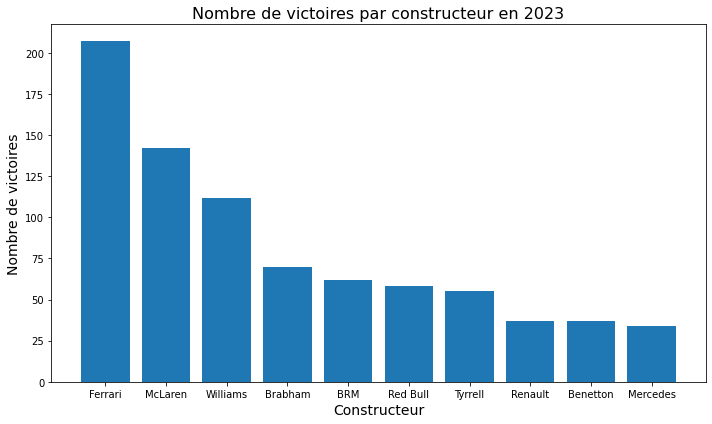

In [58]:
cle_des_indices_max = cle_des_n_indices_max(nb_wins_total, 10)
print(cle_des_indices_max)
nb_wins_interessant = {cle_des_indices_max[i] : nb_wins_total[cle_des_indices_max[i]] for i in range(len(cle_des_indices_max))}

plt.figure(figsize=(10, 6))
plt.bar(range(len(nb_wins_interessant)), list(nb_wins_interessant.values()), align='center')
plt.xticks(range(len(nb_wins_interessant)), list(nb_wins_interessant.keys()))
plt.title(f'Nombre de victoires par constructeur en {annee}', fontsize=16)
plt.xlabel("Constructeur", fontsize=14)
plt.ylabel("Nombre de victoires", fontsize=14)
plt.tight_layout()
plt.show()

### Graphique des meilleurs constructeurs d'une année en particulier

['BMW Sauber', 'McLaren', 'Toro Rosso']


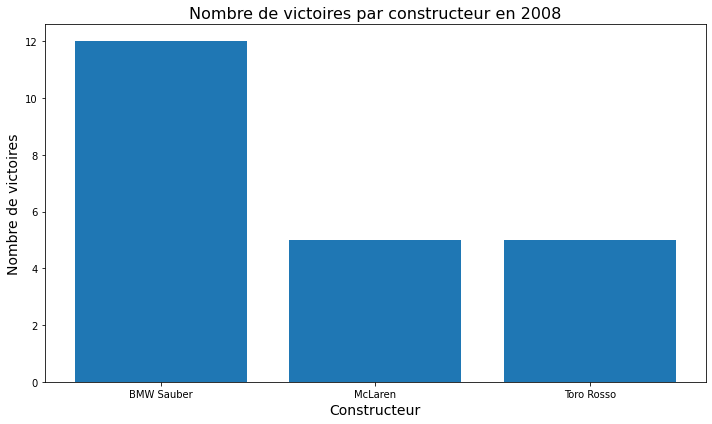

In [62]:
cle_des_indices_max = cle_des_n_indices_max(nb_wins_annee, 3)
print(cle_des_indices_max)
nb_wins_interessant = {cle_des_indices_max[i] : nb_wins_annee[cle_des_indices_max[i]] for i in range(len(cle_des_indices_max))}

plt.figure(figsize=(10, 6))
plt.bar(range(len(nb_wins_interessant)), list(nb_wins_interessant.values()), align='center')
plt.xticks(range(len(nb_wins_interessant)), list(nb_wins_interessant.keys()))
plt.title(f'Nombre de victoires par constructeur en {annee}', fontsize=16)
plt.xlabel("Constructeur", fontsize=14)
plt.ylabel("Nombre de victoires", fontsize=14)
plt.tight_layout()
plt.show()